In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
road = cv2.imread('../DATA/road_image.jpg')

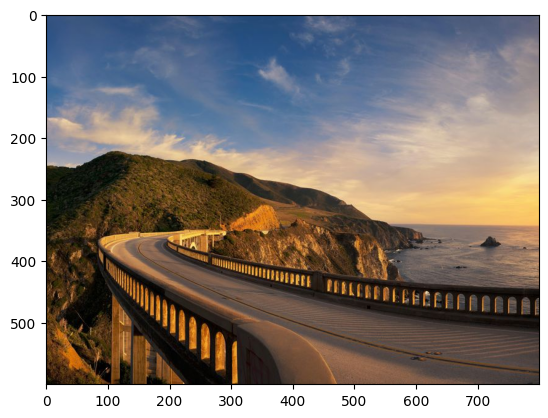

In [31]:
plt.imshow(cv2.cvtColor(road,cv2.COLOR_BGR2RGB))

In [3]:
road_copy = np.copy(road)

In [5]:
# plt.imshow(road)

In [7]:
road.shape[:2]

(600, 800)

In [8]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [9]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [11]:
from matplotlib import cm

In [12]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [20]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [21]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [24]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [25]:
###
# global variables
n_markers = 10 # 0-9
current_marker = 1 # color choice
marks_updated = False # markers updated by watershed

# callback function
def mouse_callback(event,x,y,flags,param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # markers passed to the watershed algo
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
        
        # use sees on teh road image
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1)
        
        marks_updated = True

# while true
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image',mouse_callback)

while True:
    cv2.imshow('Watershed Segments',segments)
    cv2.imshow('Road Image',road_copy)
    
    # close all windows
    k = cv2.waitKey(1)
    
    # ESC key
    if k == 27:
        break
        
    # clearing all the colors press c key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
    
    # update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        print(current_marker)
    
    
    # update the markings
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            # coloring segments, numpy call
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
        
        marks_updated = False

cv2.destroyAllWindows()